In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)


Importo il dataset e visualizzo i dati al suo interno

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/Loan_Default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Elimino Colonne ID e Year perchè sono inutili 

In [3]:
inutili=['ID','year']

data=data.drop(inutili,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [4]:
data.duplicated().sum()

0

Scelgo come target la colonna 'Status' e visualizzo la frequenza per ogni suo possibile valore

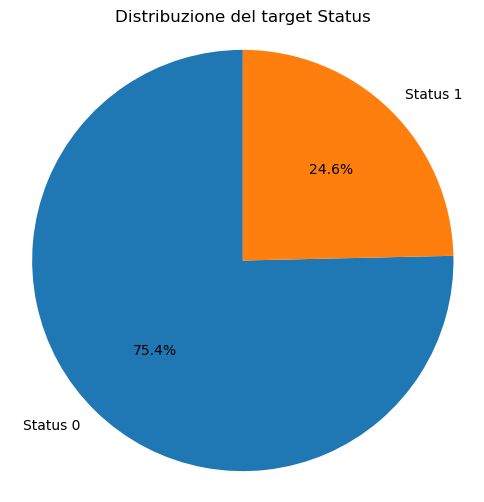

In [25]:
count_status = data['Status'].value_counts()


plt.figure(figsize=(6, 6))  
plt.pie(count_status, labels=['Status 0', 'Status 1'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione del target Status')  
plt.axis('equal')  


plt.show()

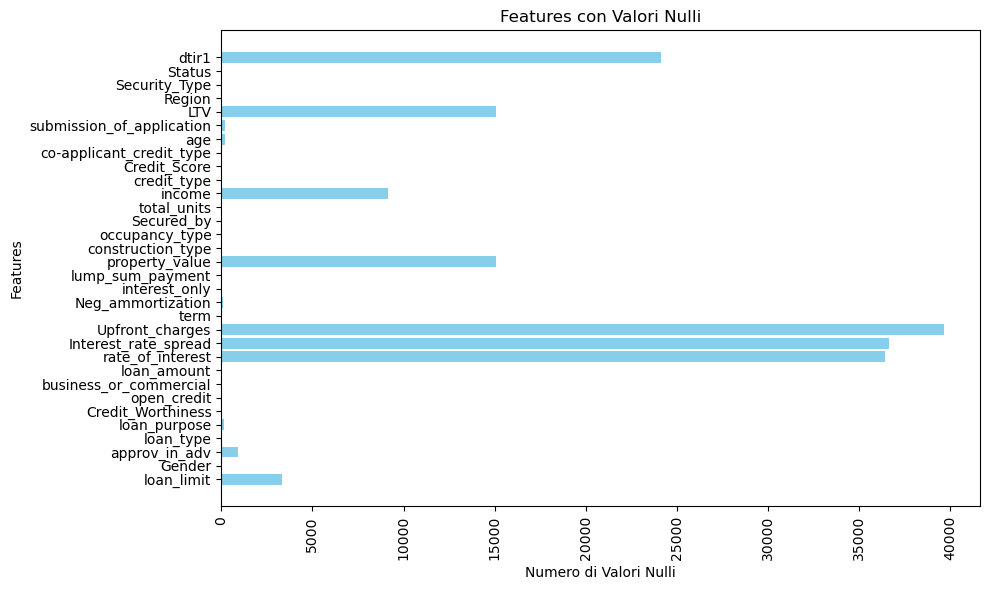

In [26]:
null_counts = data.isnull().sum()


plt.figure(figsize=(10, 6))
plt.barh(null_counts.index, null_counts.values, color='skyblue')
plt.yticks(range(len(null_counts.index)), null_counts.index) 
plt.ylabel('Features')
plt.xlabel('Numero di Valori Nulli')
plt.title('Features con Valori Nulli')
plt.xticks(rotation=90)  


plt.tight_layout()

Da una prima analisi posso notare la presenza di tanti valori nulli, approfondisco per verificare l'importanza di ciascuna feature che li contiene

In [27]:
data.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region              

Analizzo la percentuale di dati mancanti rapportandoli con la feature target

In [28]:
features_toDelete=['rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','LTV','dtir1']

for col in features_toDelete:
  null_ratio_by_target = data.groupby('Status')[col].apply(lambda x: x.isnull().mean())

  print(null_ratio_by_target)
  print(" ")



Status
0    0.000000
1    0.994541
Name: rate_of_interest, dtype: float64
 
Status
0    0.0
1    1.0
Name: Interest_rate_spread, dtype: float64
 
Status
0    0.028171
1    0.995824
Name: Upfront_charges, dtype: float64
 
Status
0    0.000018
1    0.412020
Name: property_value, dtype: float64
 
Status
0    0.000018
1    0.412020
Name: LTV, dtype: float64
 
Status
0    0.069722
1    0.445154
Name: dtir1, dtype: float64
 


In [29]:
data=data.drop(features_toDelete,axis=1)

Visualizzo i dati non numerici per vedere i possibili valori e la loro frequenza

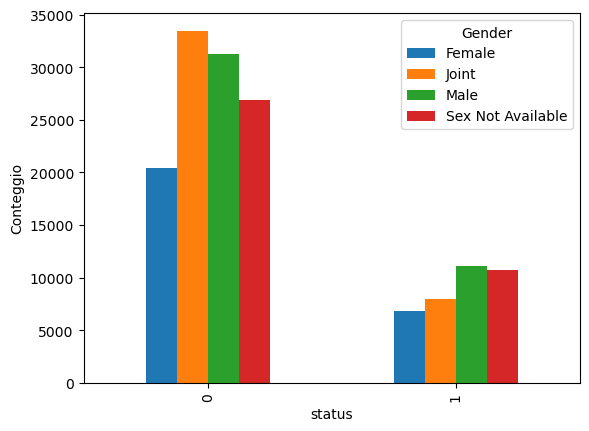

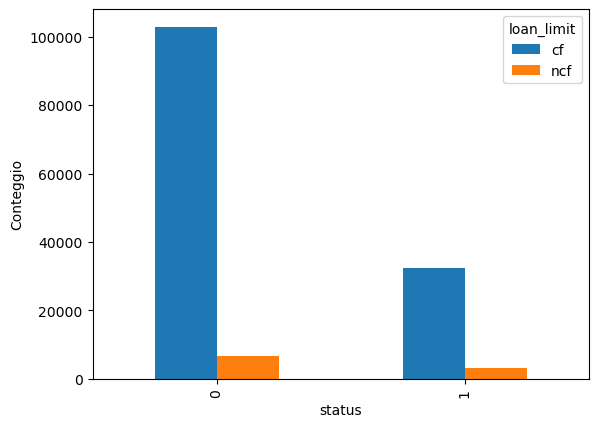

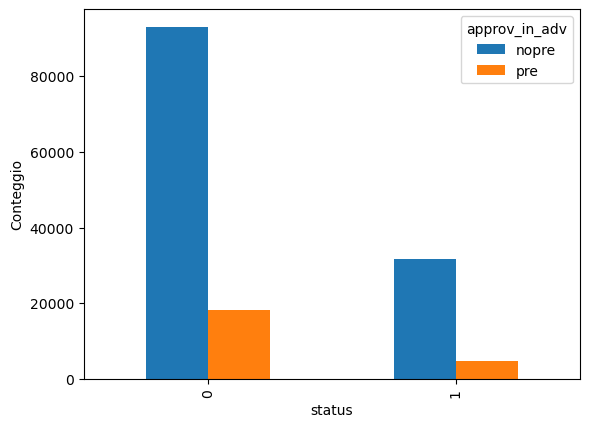

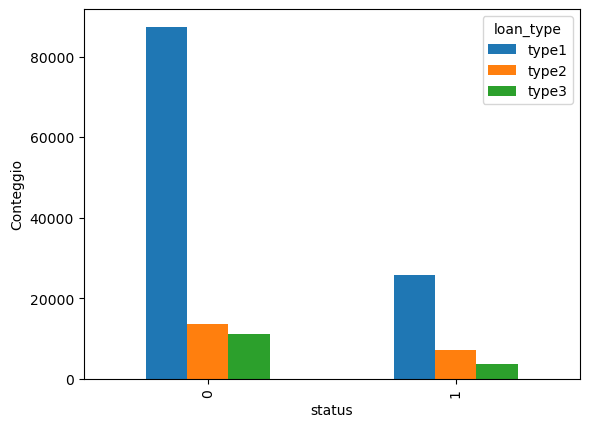

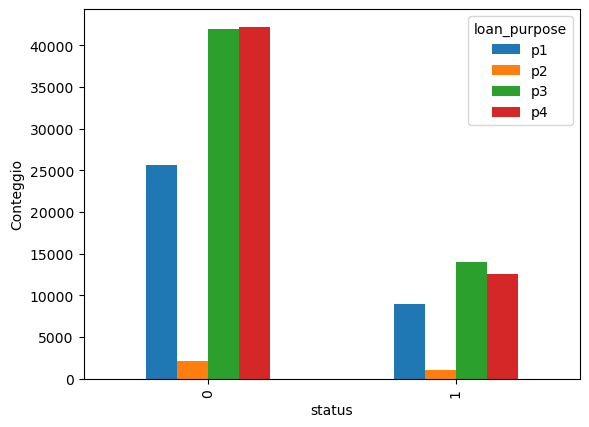

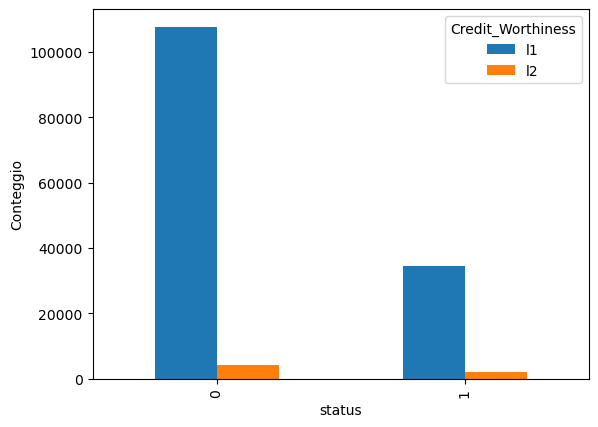

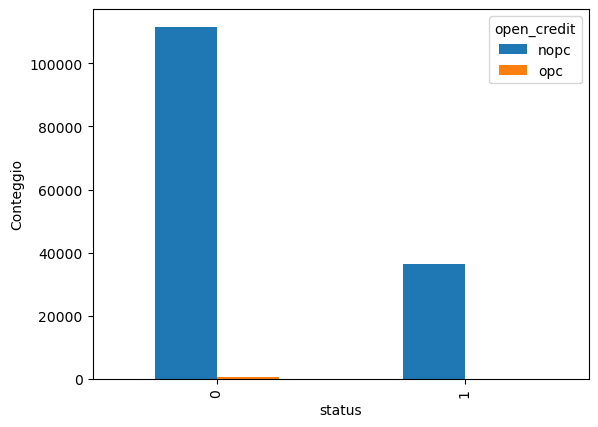

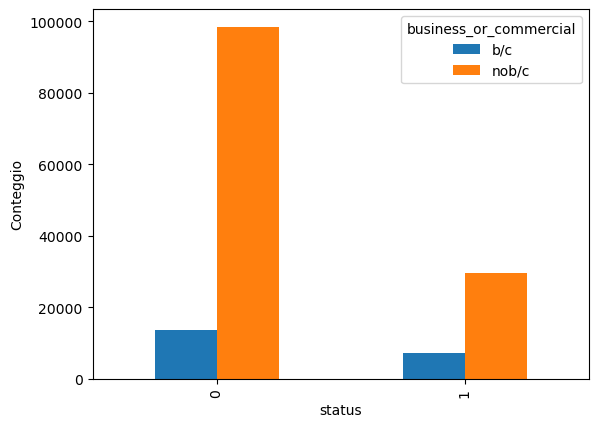

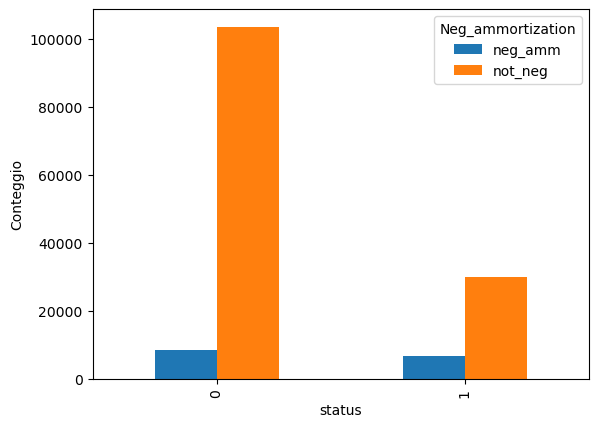

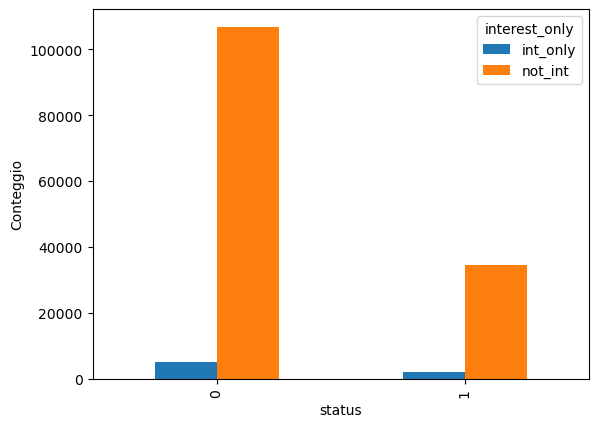

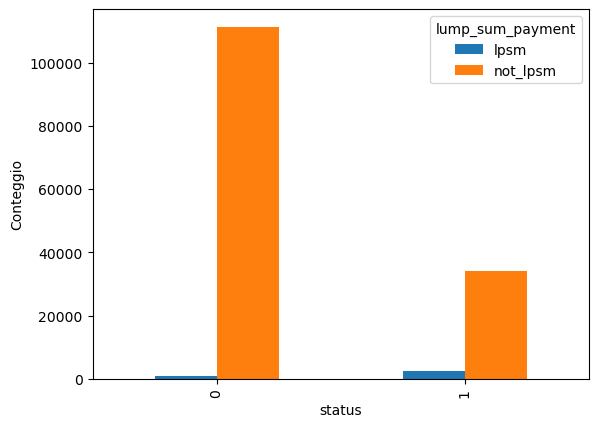

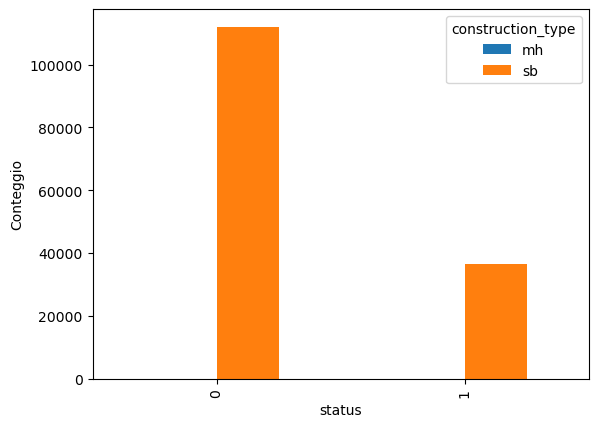

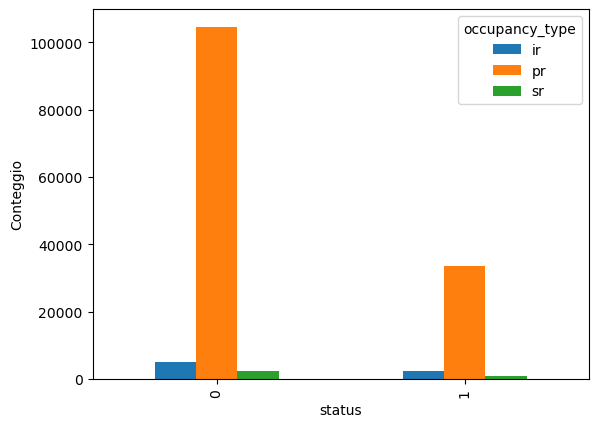

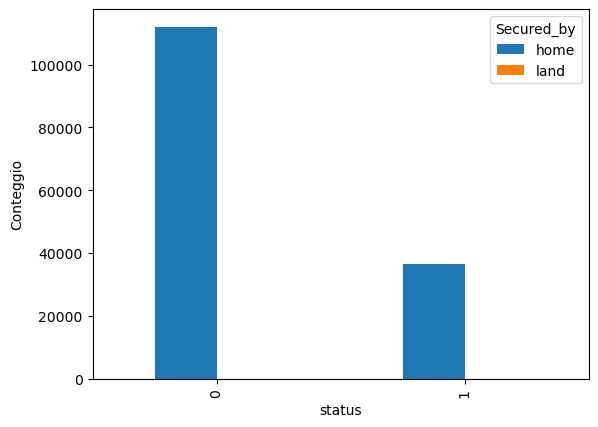

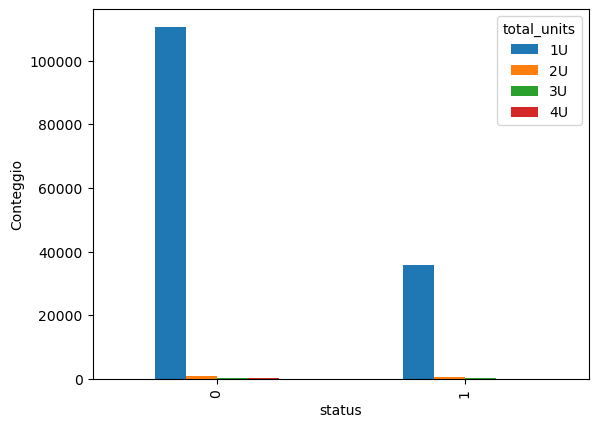

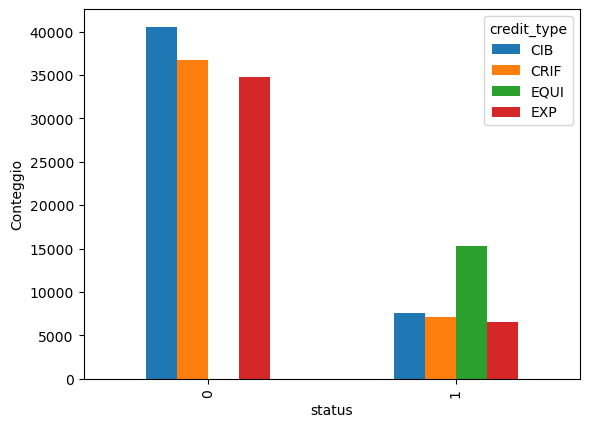

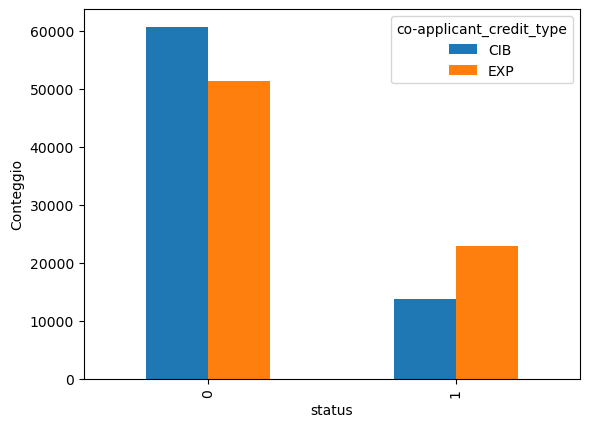

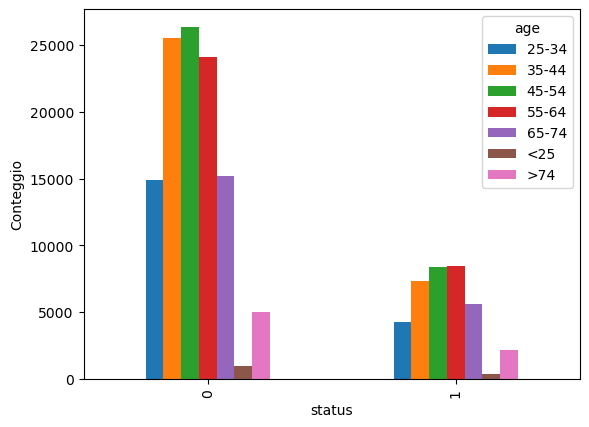

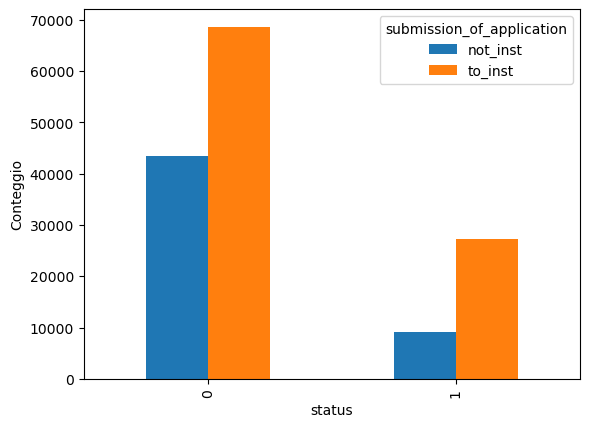

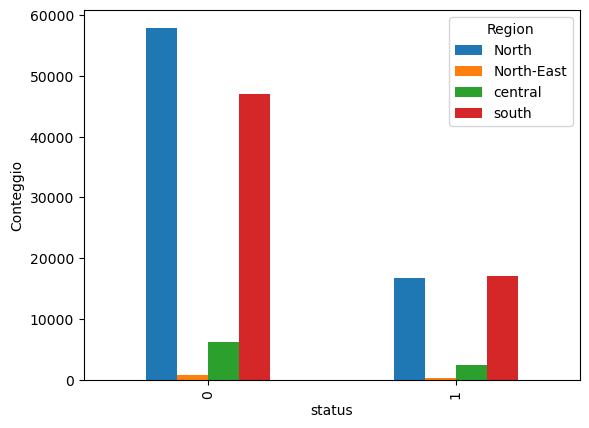

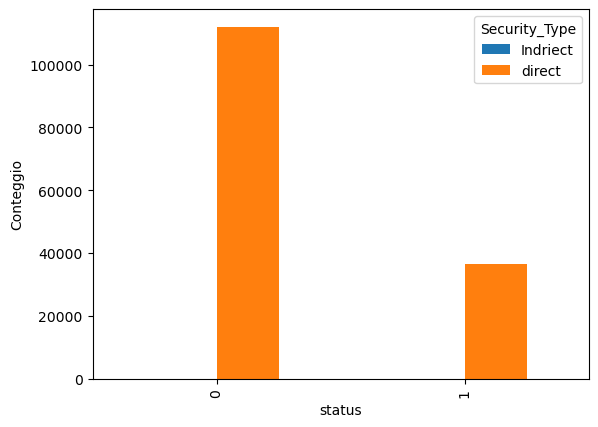

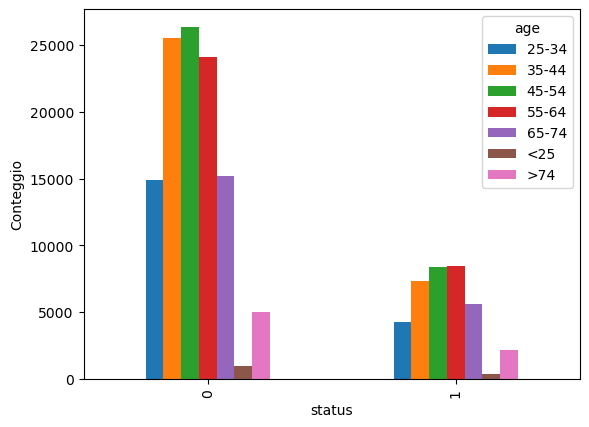

In [30]:
label_data=["Gender","loan_limit","approv_in_adv","loan_type","loan_purpose","Credit_Worthiness","open_credit","business_or_commercial",
             "Neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","Secured_by","total_units",
             "credit_type","co-applicant_credit_type","age","submission_of_application","Region","Security_Type","age"]

for col in label_data:
    fig, ax = plt.subplots()
    counts = data.groupby(['Status', col]).size().unstack()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('status')
    ax.set_ylabel('Conteggio')
    # ax.set_title(f'Bar plot of {col} by satisfaction')
    # plt.savefig(f"visualization_{col}.png")
    plt.show()

Anche se alcuni valori sono poco frequenti servono a determinare i casi in cui avviene il default

In [31]:
from sklearn.impute import SimpleImputer

colonne=['income','approv_in_adv','loan_limit','loan_purpose','term','Neg_ammortization','age','submission_of_application']
imputer = SimpleImputer(strategy='most_frequent') 

data[colonne]=imputer.fit_transform(data[colonne])

data.isnull().sum()


loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: int64

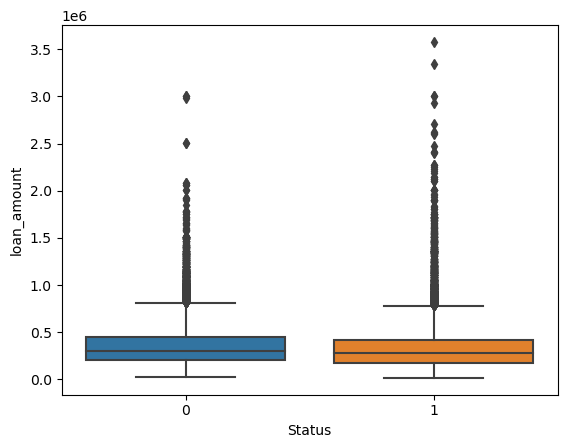

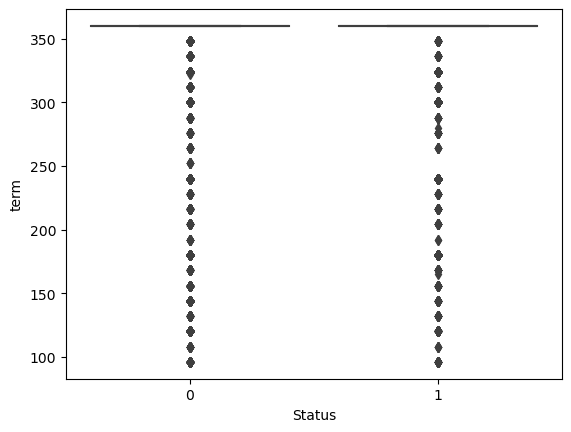

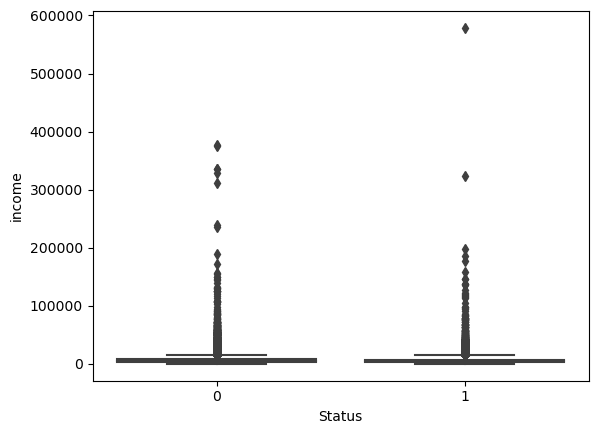

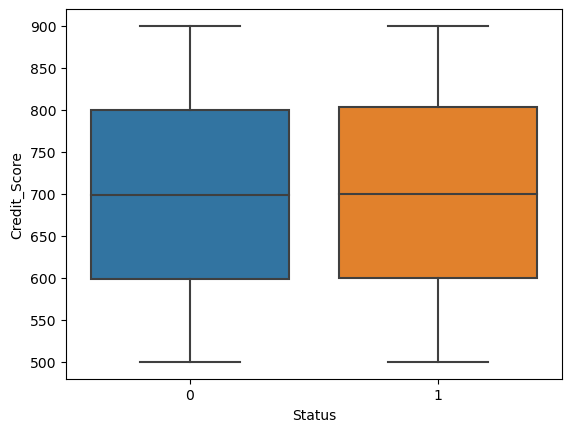

In [32]:
numerical_features=['loan_amount','term','income','Credit_Score']

for feature in numerical_features:
    plt.figsize=(16,6)
    sns.boxplot(x='Status', y=feature, data=data)
    plt.show()


Outliers in loan_amount:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
108           ncf              Joint           pre     type1           p1   
137           ncf               Male         nopre     type1           p3   
227           ncf  Sex Not Available         nopre     type1           p3   
264            cf               Male           pre     type1           p1   
330           ncf  Sex Not Available           pre     type1           p1   
...           ...                ...           ...       ...          ...   
148296        ncf              Joint         nopre     type1           p4   
148349        ncf              Joint         nopre     type1           p4   
148469        ncf               Male           pre     type1           p1   
148526        ncf              Joint         nopre     type1           p4   
148578        ncf              Joint         nopre     type1           p3   

       Credit_Worthiness open_credit business_or_c

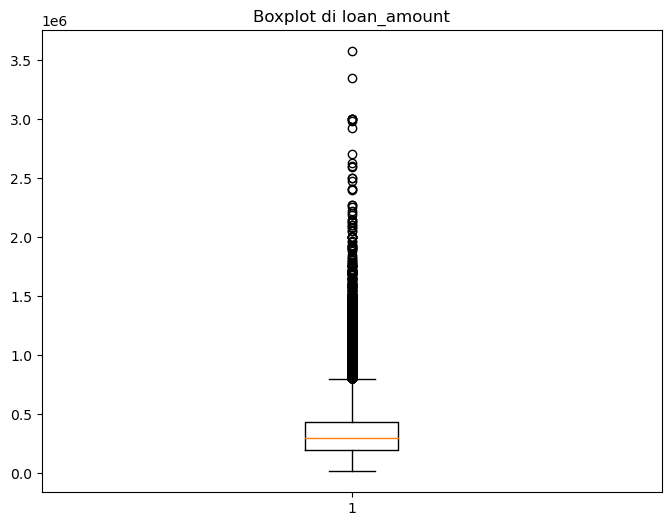

Outliers in term:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
58            ncf               Male           pre     type1           p3   
128            cf              Joint         nopre     type1           p3   
285            cf  Sex Not Available         nopre     type1           p4   
394            cf  Sex Not Available         nopre     type1           p4   
406            cf              Joint         nopre     type1           p3   
...           ...                ...           ...       ...          ...   
148363         cf               Male         nopre     type1           p4   
148365         cf  Sex Not Available           pre     type1           p4   
148493         cf               Male         nopre     type1           p3   
148537         cf  Sex Not Available         nopre     type1           p4   
148638        ncf              Joint           pre     type1           p3   

       Credit_Worthiness open_credit business_or_commerci

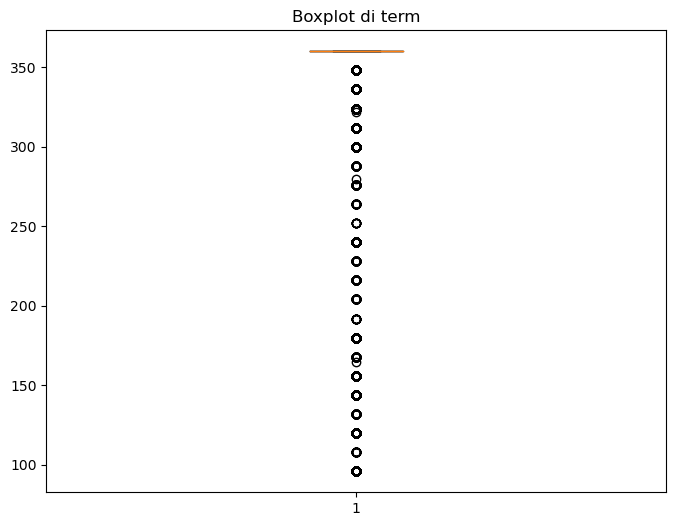

Outliers in income:
       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
144            cf              Joint         nopre     type1           p3   
163            cf              Joint         nopre     type1           p4   
185            cf  Sex Not Available           pre     type1           p1   
295            cf              Joint         nopre     type1           p4   
343            cf              Joint         nopre     type1           p1   
...           ...                ...           ...       ...          ...   
147921         cf               Male         nopre     type1           p4   
148082         cf              Joint         nopre     type1           p4   
148179         cf              Joint           pre     type1           p1   
148274         cf               Male         nopre     type1           p4   
148498         cf              Joint         nopre     type1           p1   

       Credit_Worthiness open_credit business_or_commer

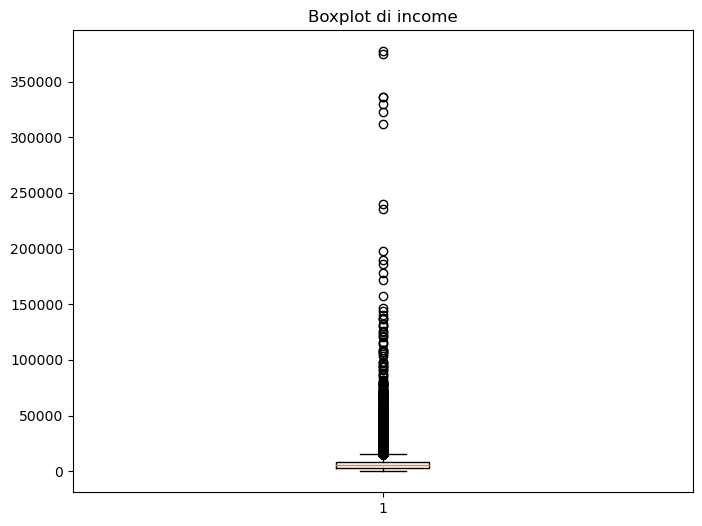

Outliers in Credit_Score:
Empty DataFrame
Columns: [loan_limit, Gender, approv_in_adv, loan_type, loan_purpose, Credit_Worthiness, open_credit, business_or_commercial, loan_amount, term, Neg_ammortization, interest_only, lump_sum_payment, construction_type, occupancy_type, Secured_by, total_units, income, credit_type, Credit_Score, co-applicant_credit_type, age, submission_of_application, Region, Security_Type, Status]
Index: []


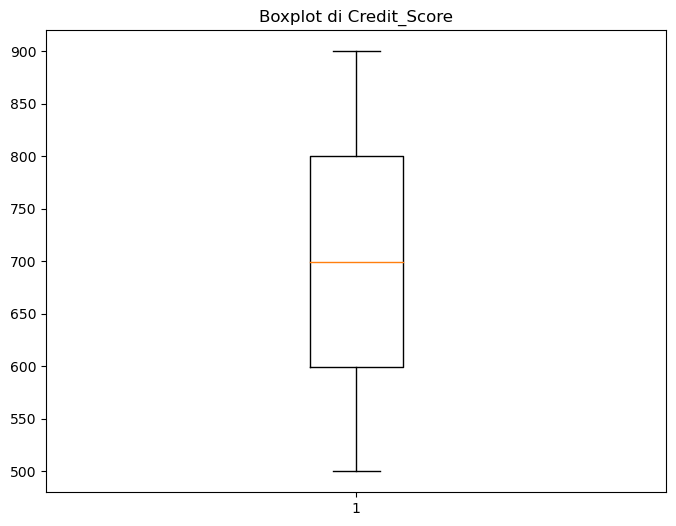

In [33]:
for feature in numerical_features:
   
    mean_value = data[feature].mean()
    std_value = data[feature].std()
    
  
    threshold = 3 * std_value  
    
    
    outliers = data[(data[feature] > mean_value + threshold) | (data[feature] < mean_value - threshold)]
    
   
    print(f"Outliers in {feature}:")
    print(outliers)
    
  
    
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[feature])
    plt.title(f'Boxplot di {feature}')
    plt.show()
    
    data=data.drop(outliers.index)

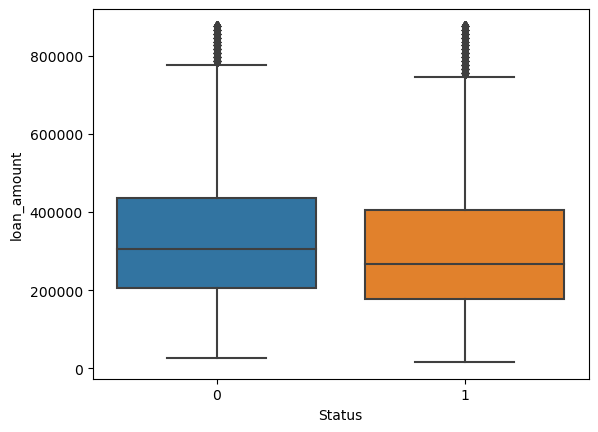

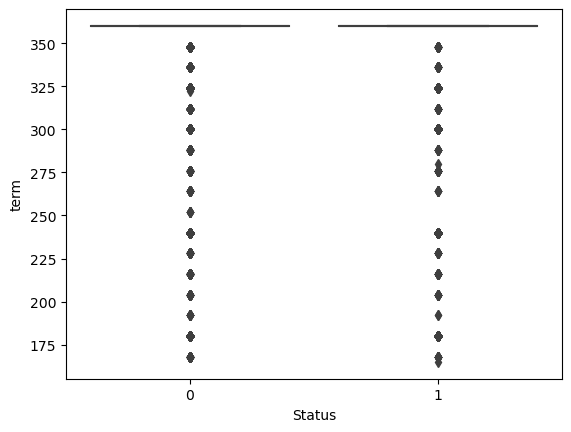

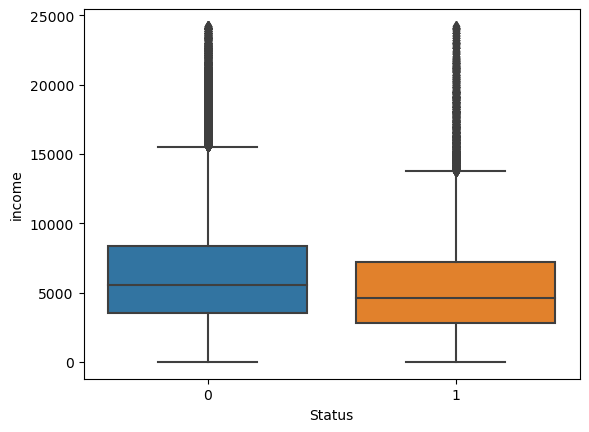

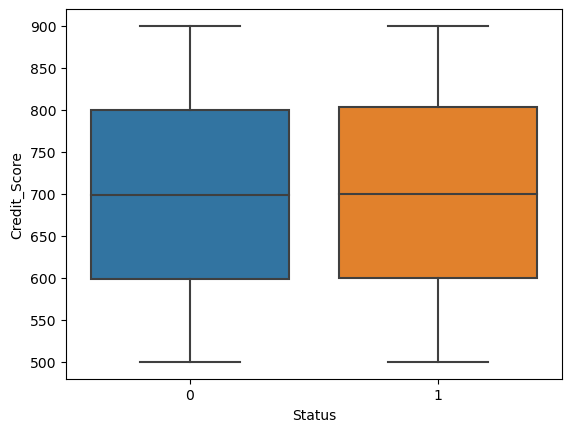

In [34]:
numerical_features=['loan_amount','term','income','Credit_Score']

for feature in numerical_features:
    plt.figsize=(16,6)
    sns.boxplot(x='Status', y=feature, data=data)
    plt.show()

In [35]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import os

encoder = OrdinalEncoder(dtype=np.int16)
data[label_data] = encoder.fit_transform(data[label_data])

In [36]:
data.to_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/dataset_clean.csv', index=False)

In [37]:
dataset=data.drop('Status',axis=1)
y=data['Status']

x_train, x_test, y_train, y_test = train_test_split(dataset, y, train_size=0.8)

<AxesSubplot:>

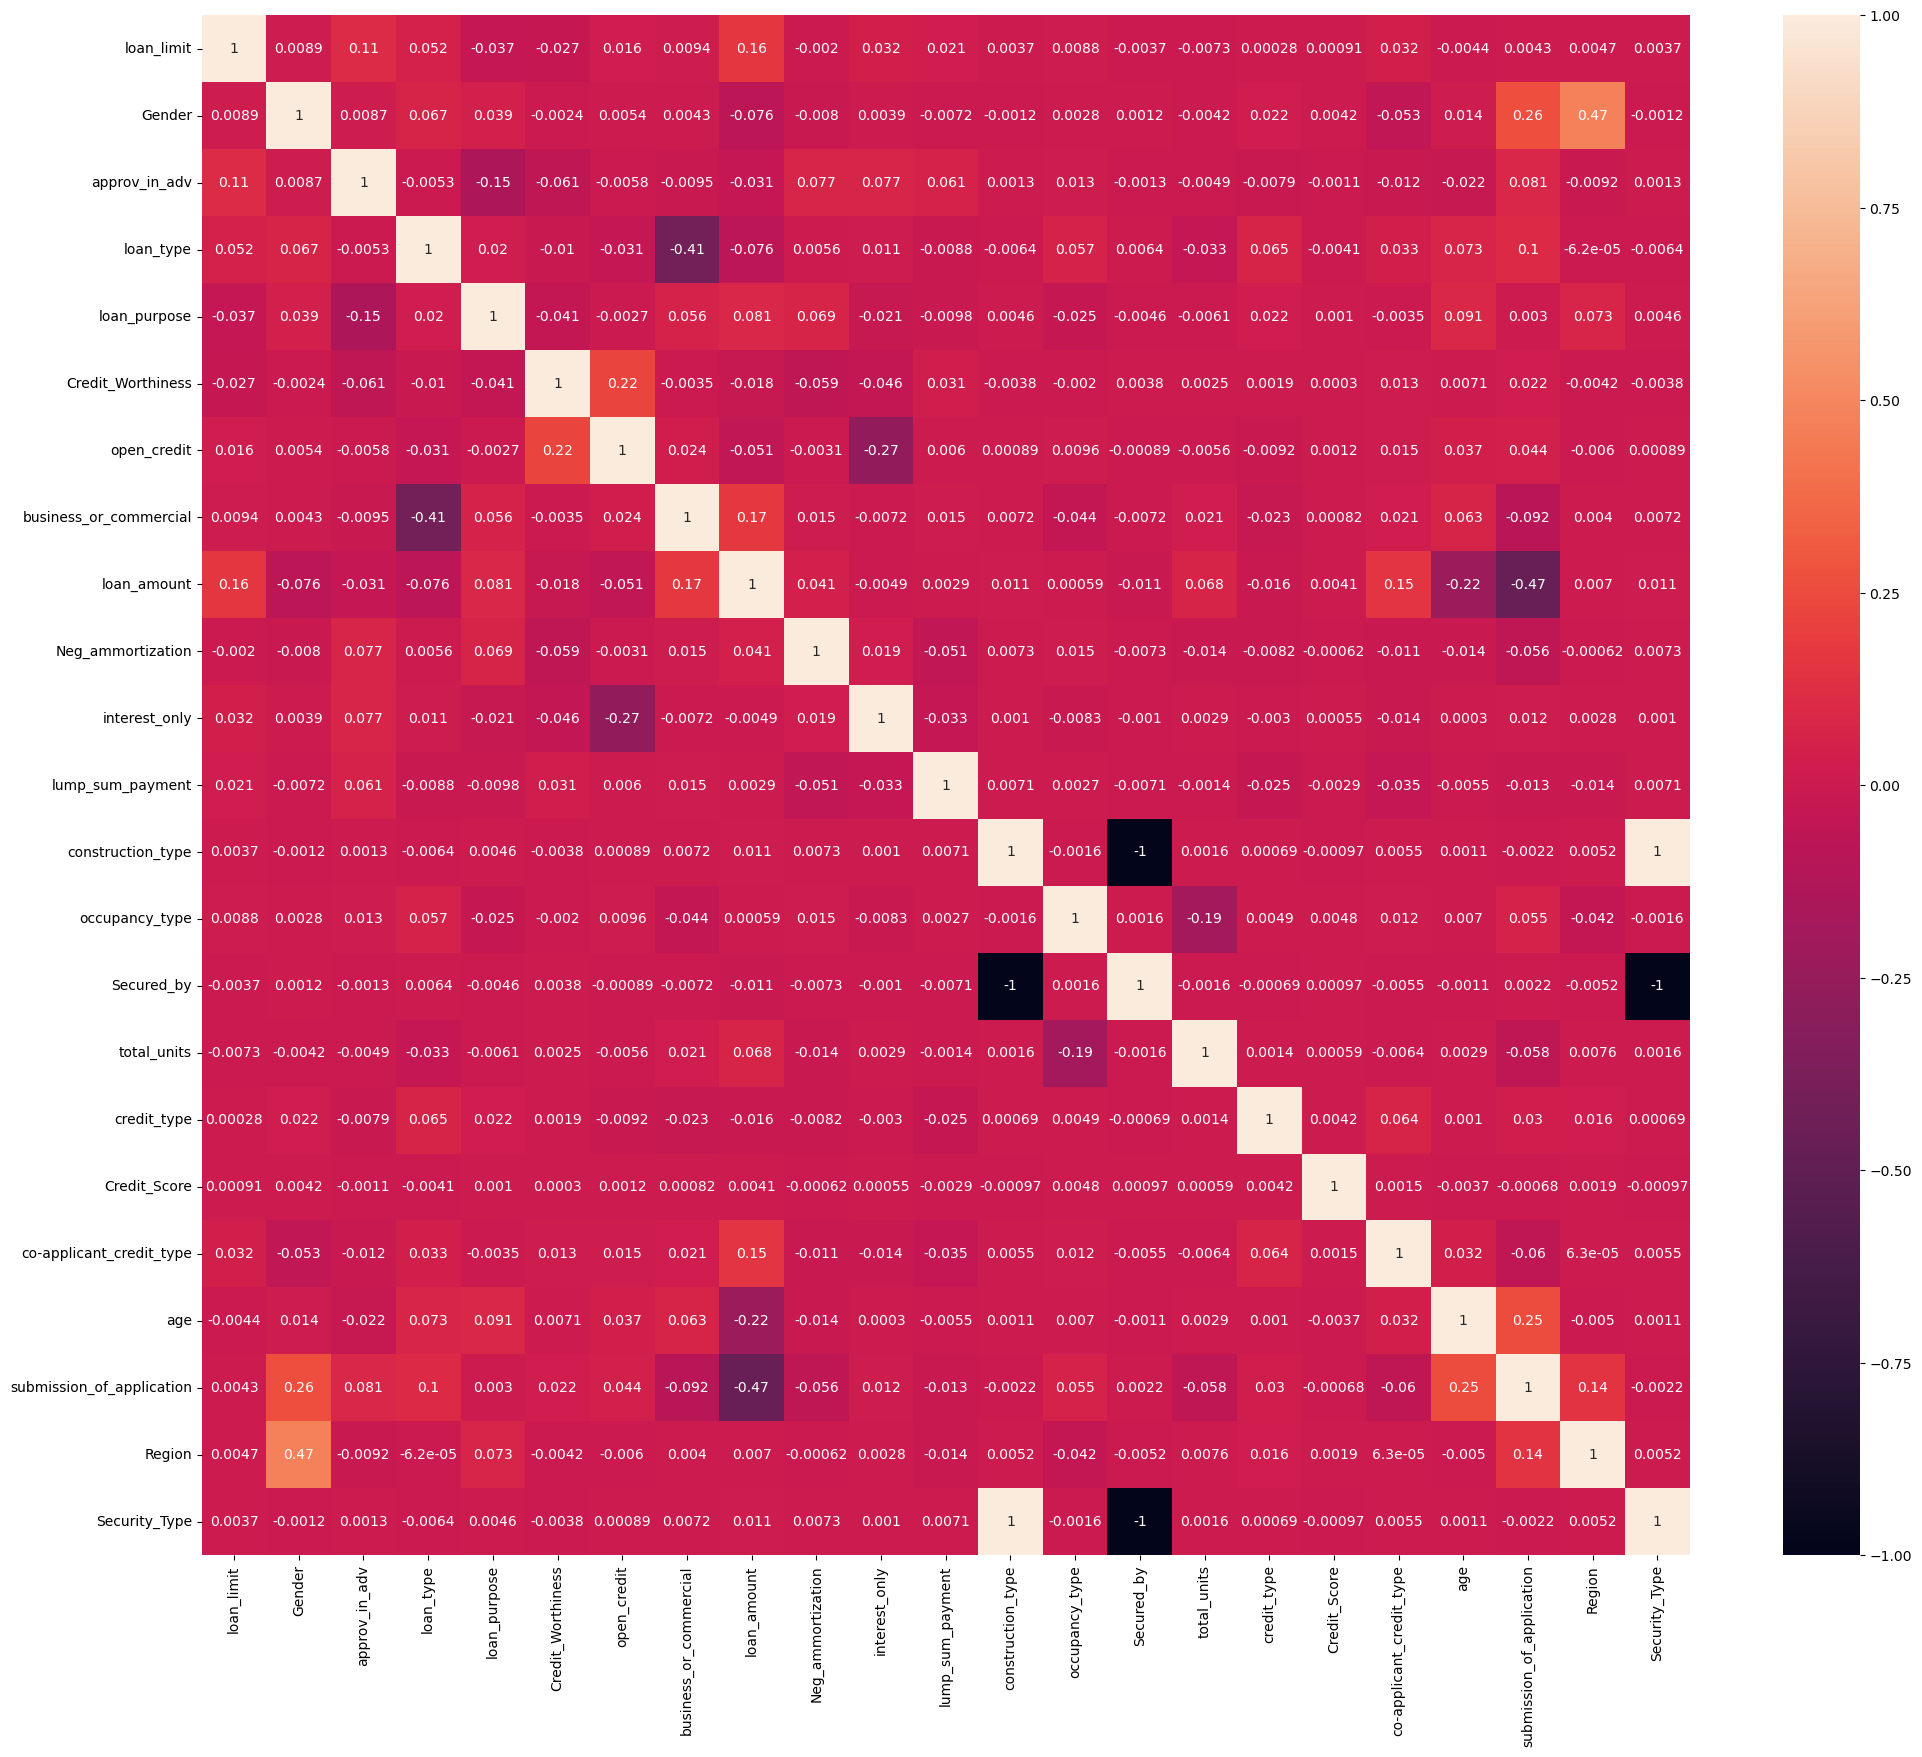

In [38]:
fig, ax = plt.subplots(figsize=(24,20))
sns.heatmap(dataset.corr(), annot=True, ax=ax)

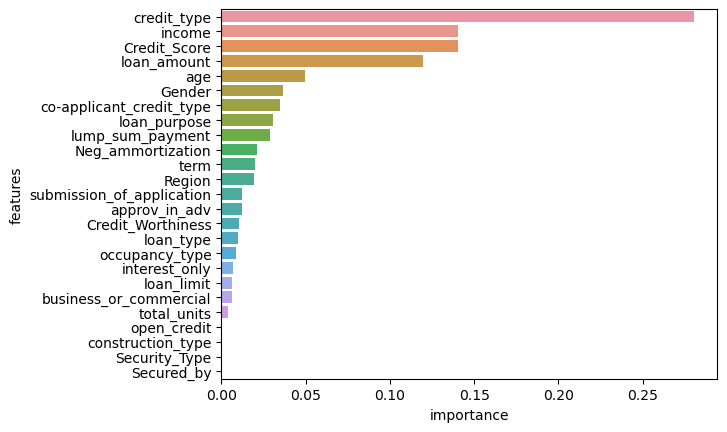

In [39]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=50,n_jobs=-1)
rf.fit(x_train, y_train)

feature_importance = pd.DataFrame(data={
    "features": x_train.columns,
    "importance": rf.feature_importances_
})
feature_importance.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(data=feature_importance,x='importance',y='features')
plt.savefig("feature importance.png",dpi=400,bbox_inches="tight")

Posso notare la presenza di altre features poco utili, decido dunque di eliminarle

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


Text(0.5, 1.0, 'Average score: 0.7994034238284627')

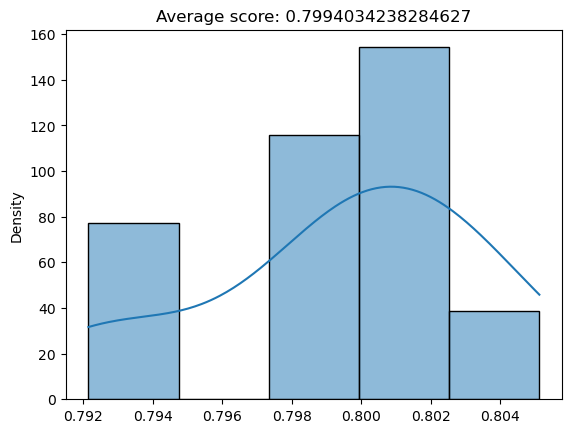

In [40]:
features_inutili=['open_credit','construction_type','Secured_by','Security_Type']

train_data=x_train.drop(features_inutili,axis=1)
test_data=x_test.drop(features_inutili,axis=1)

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='log_loss', min_samples_split=4,random_state=42)
tree_clf.fit(train_data, y_train)

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    tree_clf, train_data, y_train, cv=10, scoring="accuracy", verbose=1, n_jobs=-1
)
sns.histplot(cv_scores, kde=True, stat="density")
plt.title("Average score: {}".format(np.mean(cv_scores)))

In [43]:
y_train.value_counts()

0    87284
1    28376
Name: Status, dtype: int64

In [42]:
train_data.to_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/train_data.csv', index=False)
test_data.to_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/test_data.csv', index=False)
y_train.to_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/train_y.csv', index=False)
y_test.to_csv('/Users/ragno/Documents/Progetti/Mldm/ProgettoMLDM/Dataset/test_y.csv', index=False)
